<a href="https://colab.research.google.com/github/2147118Joshua/Machine_Learning/blob/main/RPV_Reff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix  
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


# Reading the dataset from the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/HCV1.csv.csv")
#prints first 10 file in csv
df.head(40)

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0=Blood Donor
1,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0=Blood Donor
2,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0=Blood Donor
3,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0=Blood Donor
4,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0=Blood Donor
5,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0,0=Blood Donor
6,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5,0=Blood Donor
7,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1,0=Blood Donor
8,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3,0=Blood Donor
9,32,m,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9,0=Blood Donor


#EDA

In [ ]:
df.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0=Blood Donor
1,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0=Blood Donor
2,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0=Blood Donor
3,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0=Blood Donor
4,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0=Blood Donor


In [ ]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [ ]:
df.shape

(615, 13)


# data 0 -blood dononr 0s- suspect blood donor 1 -hepatitis 2 -firosis 3 -cirrhosis

In [ ]:
def convertCatNum(dataset):
  le = preprocessing.LabelEncoder()
  notCol = df._get_numeric_data().columns
  for col in df.columns:
    if col not in notCol:
      dataset[col]=le.fit_transform(dataset[col]) 
  return dataset

# replacing null values with median


In [ ]:
def remNull(dataset, nullcol):
    imputer = SimpleImputer(missing_values=np.nan,strategy="median")
    imputer.fit(dataset.iloc[:,nullcol])
    dataset.iloc[:,nullcol]=imputer.transform(dataset.iloc[:,nullcol])
    print("Checking null value:\n")
    print(dataset.isnull().sum())
    print("\n\n")
    return dataset

#  train and test 


In [ ]:
def splitter(dataset, colsx, colsy):
  # X=dataset.iloc[:,2:].values
  # y=dataset.iloc[:,1].values
  X = dataset[[*colsx]].values
  y = dataset[[*colsy]].values
  SD=StandardScaler()
  X=SD.fit_transform(X)
  #y=np.column_stack(SD.fit_transform(y))
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)
  return X_train, X_test, y_train, y_test

In [ ]:
df.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0=Blood Donor
1,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0=Blood Donor
2,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0=Blood Donor
3,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0=Blood Donor
4,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0=Blood Donor


In [ ]:
df.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0=Blood Donor
1,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0=Blood Donor
2,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0=Blood Donor
3,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0=Blood Donor
4,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0=Blood Donor


In [ ]:
df = convertCatNum(df.copy())

In [ ]:
df.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0


# remove null value and replace it with median of the column

In [ ]:
df.isnull().sum()

Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
Category     0
dtype: int64

In [ ]:
# The array contains the column numbers that have null values
df = remNull(df.copy(), [2,3,4,5,6,8,11])

Checking null value:

Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
Category    0
dtype: int64





In [ ]:
df.isnull().sum()

Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
Category    0
dtype: int64

In [ ]:
df.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0


# Pie chart

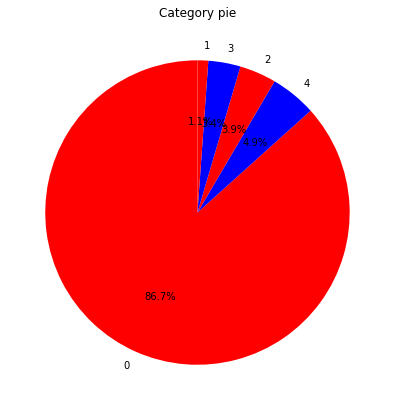

In [ ]:
labels =df['Category'].value_counts(sort = True).index
sizes = df['Category'].value_counts(sort = True)
colors = ["Red","Blue"]
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,)
plt.title('Category pie')
plt.show()

# Heat map

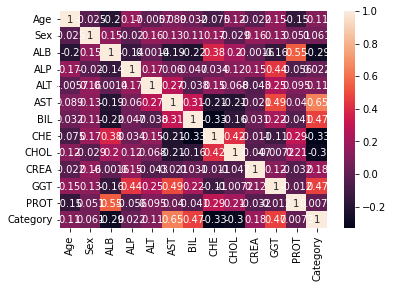

In [ ]:
sns.heatmap(df.corr() , annot = True)

correlation values
More than 0.5
Prot - ALB
0.4 - 0.5
ALP - GGT
AST - GGT
Less than 0 / Negative values
CHOL / ALB / CHE - GGT
CHOL /Age / ALB / CHE - CREA
BIL / ALB - CHE

# Logistic regression Classifier

Logistic Regression gives the probalistic values between 0 and 1. It uses the sigmoid function and based on that it gives the accutracy scotre. Logistic regression is used for classification as well as regression.

In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).

The S-form curve is called the Sigmoid function or the logistic function.

our dataset is Multinomial logistic regression

In [ ]:
x_train, x_test, y_train, y_test = splitter(df, ['Age',	'Sex'	,'ALB',	'ALP',	'ALT',	'AST',	'BIL',	'CHE',	'CHOL',	'CREA',	'GGT',	'PROT'], ['Category'])

In [ ]:
model= LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
x_train_prediction= model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data',training_data_accuracy)

Accuracy on training data 0.9613821138211383


# Confusion matrix: x_test and y_test to test the accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


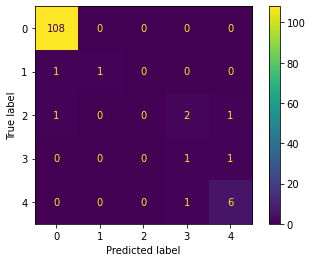

In [ ]:
plot_confusion_matrix(model, x_test, y_test)  

# Comapring TruePositive, FalsePositive rate using graph

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


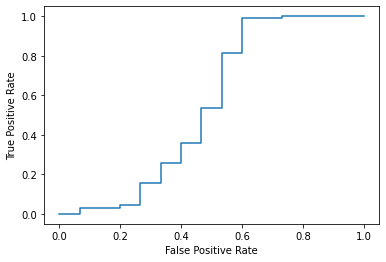

In [ ]:

log_regression = LogisticRegression()
log_regression.fit(x_train,y_train)
y_pred_proba = log_regression.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=0)
# plt.plot(fpr,tpr ,color="navy")
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#Predicting the test set result  
y_pred= model.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[108,   0,   0,   0,   0],
       [  1,   1,   0,   0,   0],
       [  1,   0,   0,   2,   1],
       [  0,   0,   0,   1,   1],
       [  0,   0,   0,   1,   6]])

# Acuuracy classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       108
           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         4
           3       0.25      0.50      0.33         2
           4       0.75      0.86      0.80         7

    accuracy                           0.94       123
   macro avg       0.60      0.57      0.56       123
weighted avg       0.93      0.94      0.93       123



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Accuracy of logistic regression classifier of test: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy of logistic regression classifier of test: 0.94


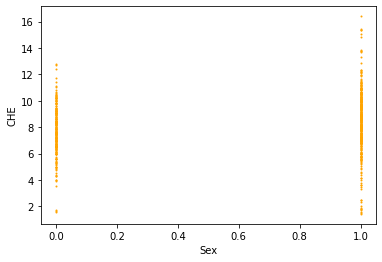

In [ ]:
df.plot.scatter(x = 'Sex', y = 'CHE', s = 1, c='orange')

# MLP combined activation measures

In [ ]:
sc=StandardScaler()
scaler = sc.fit(x_train)
trainX_scaled = scaler.transform(x_train)
testX_scaled = scaler.transform(x_test)

In [ ]:

clf = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
clf.predict_proba(x_test)
clf.score(x_test, y_test)

0.9186991869918699

In [ ]:
pred = clf.score(x_train,y_train)
pred

0.9959349593495935

In [ ]:
activationList = ["relu", "identity", "logistic", "tanh"]
for i in range(0,4):
  clf = MLPClassifier(activation = activationList[i]);
  clf.fit(x_train, y_train);
  tempscore = clf.score(x_train, y_train)
  print("Activation function -",activationList[i],"- Accuracy : ",tempscore)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Activation function - relu - Accuracy :  0.9857723577235772


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Activation function - identity - Accuracy :  0.9654471544715447


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Activation function - logistic - Accuracy :  0.9512195121951219
Activation function - tanh - Accuracy :  0.975609756097561


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


**Inference:** *We can see that the Activation function: relu has more Accuracy Score compared to others*

In [ ]:
y_pred = clf.predict(testX_scaled)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.93


In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[106   0   0   1   1]
 [  0   1   0   1   0]
 [  1   0   0   2   1]
 [  0   0   0   1   1]
 [  0   0   0   1   6]]


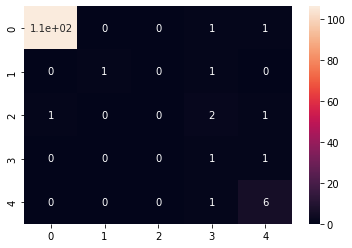

In [ ]:
sns.heatmap(cf_matrix, annot=True)

# TruePositive and FalsePositive of x_train and y_train graphical represnetation

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


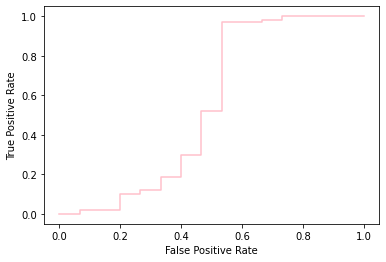

In [ ]:

mlp = MLPClassifier()
mlp.fit(x_train,y_train)
y_pred_proba = mlp.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=0)
plt.plot(fpr,tpr ,color="pink")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# TruePositive and FalsePositive of test and test graphical represnetation

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


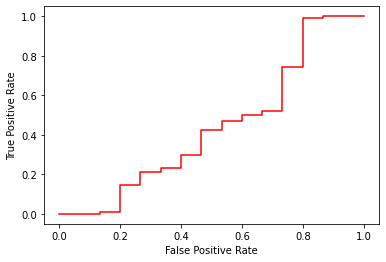

In [ ]:

mlp = MLPClassifier()
mlp.fit(x_test,y_test)
y_pred_proba = mlp.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=0)
plt.plot(fpr,tpr ,color="red")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#MLP with three activation measures seprately


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [ ]:
yy_pred = mlp_clf.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, yy_pred)))

Accuracy: 0.93


In [ ]:
print(classification_report(y_test,yy_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         4
           3       0.20      0.50      0.29         2
           4       0.71      0.71      0.71         7

    accuracy                           0.93       123
   macro avg       0.58      0.54      0.53       123
weighted avg       0.91      0.93      0.92       123



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
mlp_clf1 = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 100,activation = 'tanh',
                        solver = 'adam')

mlp_clf1.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='tanh', hidden_layer_sizes=(150, 100, 50),
              max_iter=100)

In [ ]:
yyy_pred = mlp_clf1.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, yyy_pred)))

Accuracy: 0.93


In [ ]:
print(classification_report(y_test,yyy_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         4
           3       0.17      0.50      0.25         2
           4       0.67      0.86      0.75         7

    accuracy                           0.93       123
   macro avg       0.56      0.57      0.53       123
weighted avg       0.93      0.93      0.92       123



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
mlp_clf2 = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 150,activation = 'logistic',
                        solver = 'adam')

mlp_clf2.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='logistic', hidden_layer_sizes=(150, 100, 50),
              max_iter=150)

In [ ]:
pred = mlp_clf2.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, pred)))

Accuracy: 0.93


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       108
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2
           4       0.64      1.00      0.78         7

    accuracy                           0.93       123
   macro avg       0.32      0.40      0.35       123
weighted avg       0.88      0.93      0.91       123



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# MLP INFERENCE

In [ ]:
clf = MLPClassifier(random_state=42)
params_MLP = {
        "hidden_layer_sizes":[64,128,256],
        "activation":["identity", "logistic", "tanh", "relu"],
        'solver': ["lbfgs", "sgd", "adam"],
        "learning_rate":["constant", "invscaling", "adaptive"],
        'max_iter': [100,200],
        "warm_start":[True]
}

In [ ]:
X = df.drop(['Category'],axis=1)
y = df["Category"]

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [ ]:
standard_sc = preprocessing.StandardScaler() 
X_train=standard_sc.fit_transform(X_train)
X_test=standard_sc.transform(X_test)

In [ ]:
model_MLP = GridSearchCV(clf,param_grid=params_MLP, cv=3,n_jobs=-1)
model_MLP.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(cv=3, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [64, 128, 256],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'max_iter': [100, 200],
                         'solver': ['lbfgs', 'sgd', 'adam'],
                         'warm_start': [True]})

In [ ]:
y_train_pred_MLP = model_MLP.predict(X_train)
y_test_pred_MLP = model_MLP.predict(X_test)

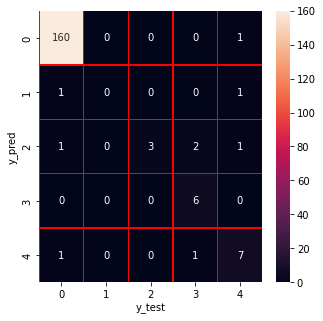

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_test_pred_MLP)  

import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred_MLP))

Mlp also known as multilayer perceptron is a neural network based classifier. It has an approach of feedforward. 
Here i have used 3 activation functions 1.relu 2.logistic which uses sigmoid function 3.tanh . I have also changed the number of iterations for each activation function .When the number of iterations are low the accuracy also falls by a certain percent. The more the number of iterations the more accurate is the result. The iteration also defines how the precision recall and f1-score varies as the number of iterations are changed.